In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [10]:
#converted into four target label
df['NObeyesdad']=df['NObeyesdad'].map({'Normal_Weight':'Normal_Weight', 'Overweight_Level_I':'Overweight_Level',
                      'Overweight_Level_II':'Overweight_Level',
       'Obesity_Type_I':'Obesity', 'Insufficient_Weight':'Insufficient_Weight',
                      'Obesity_Type_II':'Obesity',
       'Obesity_Type_III':'Extreme Obesity'})

In [11]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level', 'Obesity',
       'Insufficient_Weight', 'Extreme Obesity'], dtype=object)

In [12]:
# new features  created weight with repect to height
df['w/h']=df['Weight']/df['Height']

In [13]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           5
w/h                               1954
dtype: int64

# # EDA

In [14]:
# seperate categorical and numeric column 
cat=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC',
     'CALC','MTRANS','NObeyesdad']
num=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','w/h']

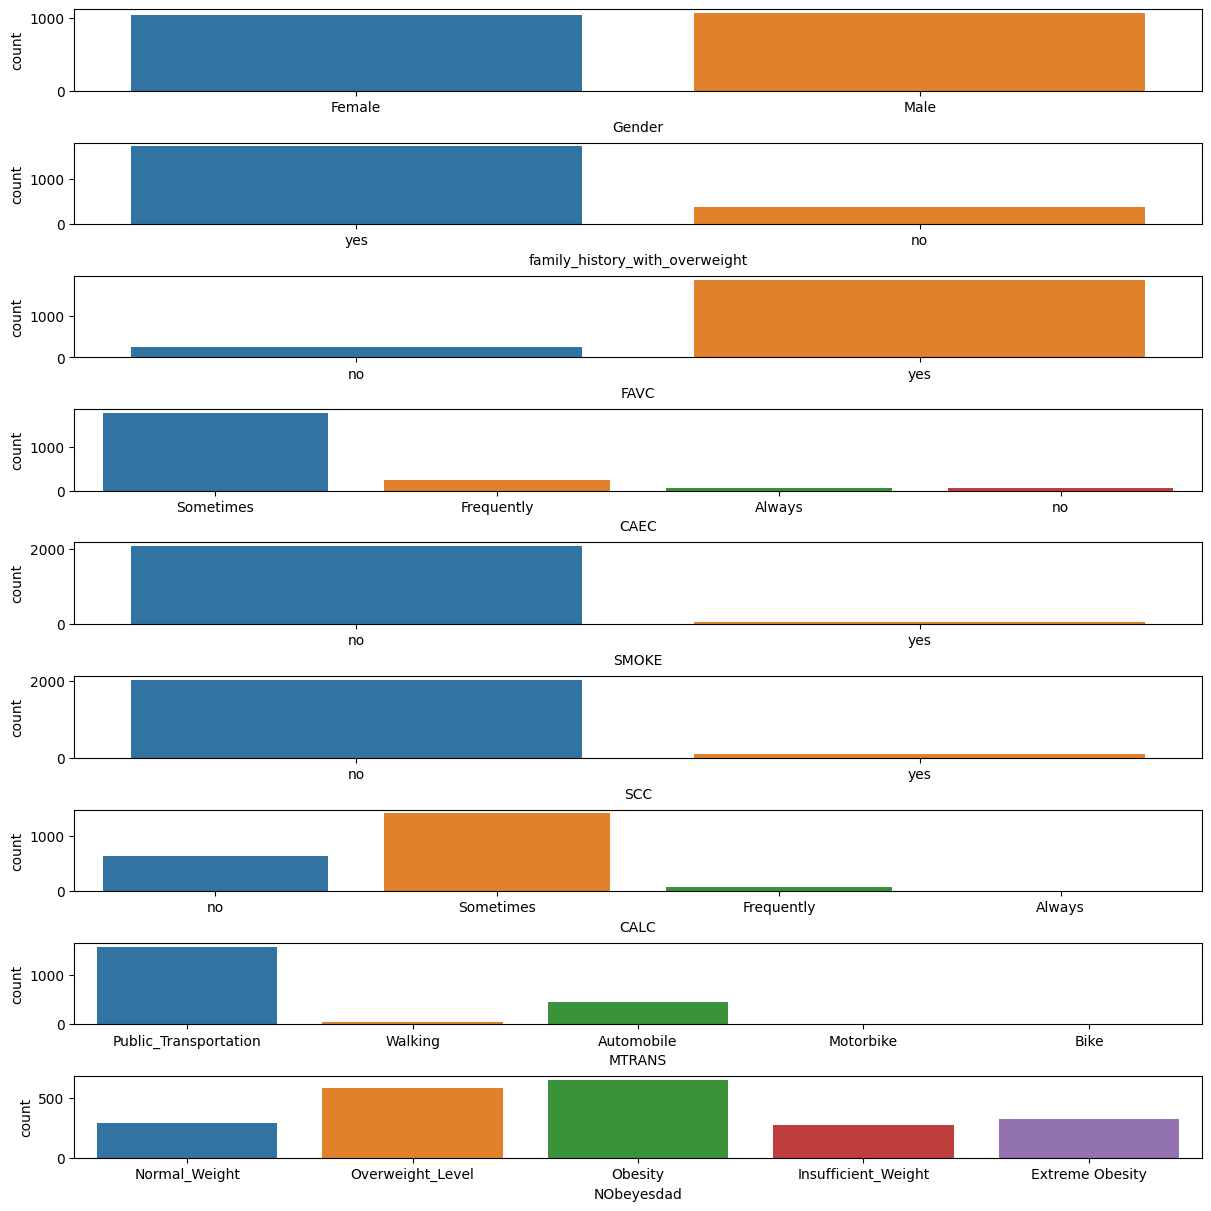

In [15]:
count=0
fig,ax=plt.subplots(len(cat),constrained_layout=True,figsize=(12,12))
for i in cat:
    sns.countplot(x=i,data=df,ax=ax[count])
    count+=1

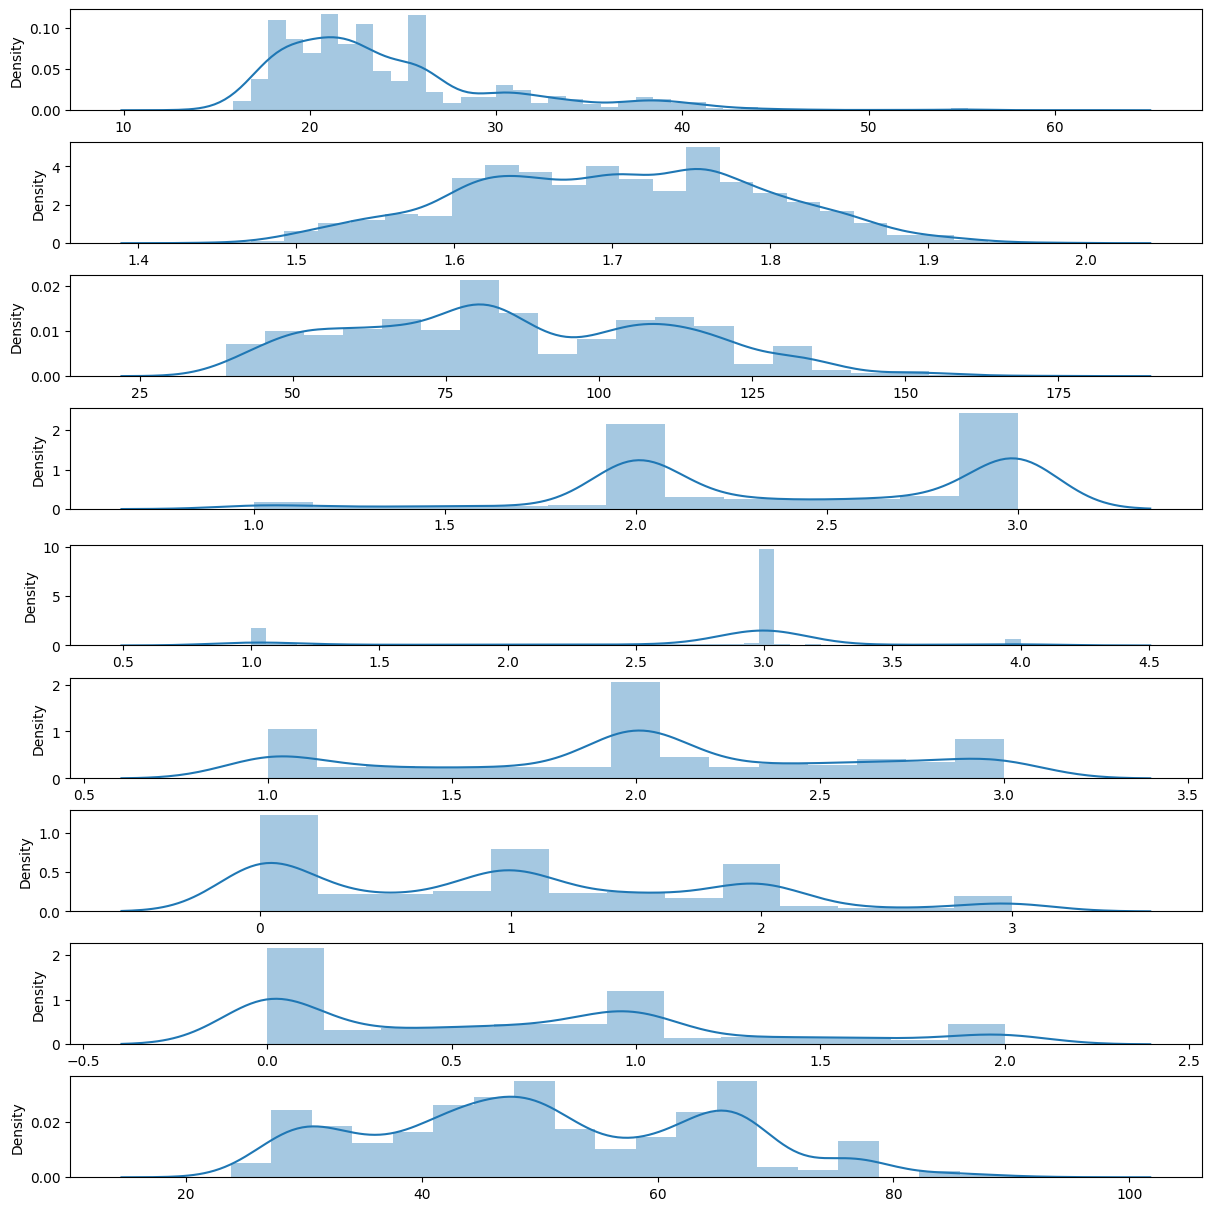

In [16]:
count=0
fig,ax=plt.subplots(len(num),constrained_layout=True,figsize=(12,12))
for i in num:
    sns.distplot(x=df[i],ax=ax[count])
    count+=1

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Insufficient_Weight'),
  Text(4, 0, 'Extreme Obesity')])

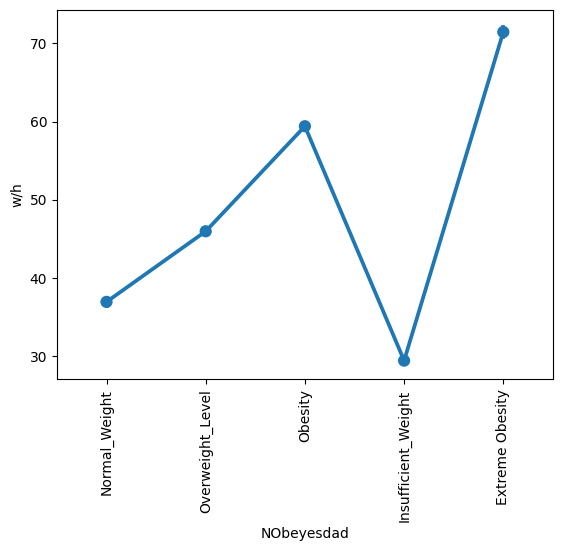

In [17]:
# weight/height is correlated to NObeyesdad feature
sns.pointplot(x='NObeyesdad',y='w/h',data=df)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Insufficient_Weight'),
  Text(4, 0, 'Extreme Obesity')])

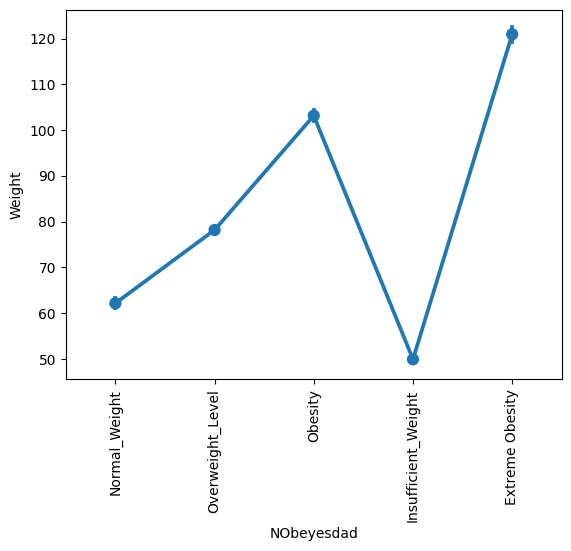

In [18]:
# weight is correlated to NObeyesdad feature
sns.pointplot(x='NObeyesdad',y='Weight',data=df)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Insufficient_Weight'),
  Text(4, 0, 'Extreme Obesity')])

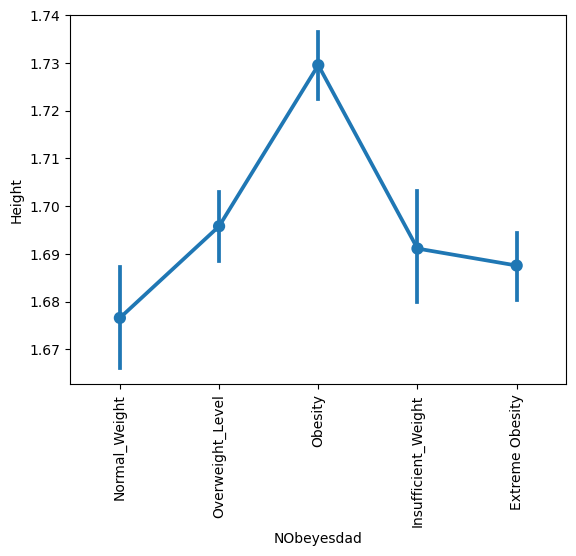

In [19]:
# 
sns.pointplot(x='NObeyesdad',y='Height',data=df)
plt.xticks(rotation='vertical')

<AxesSubplot: >

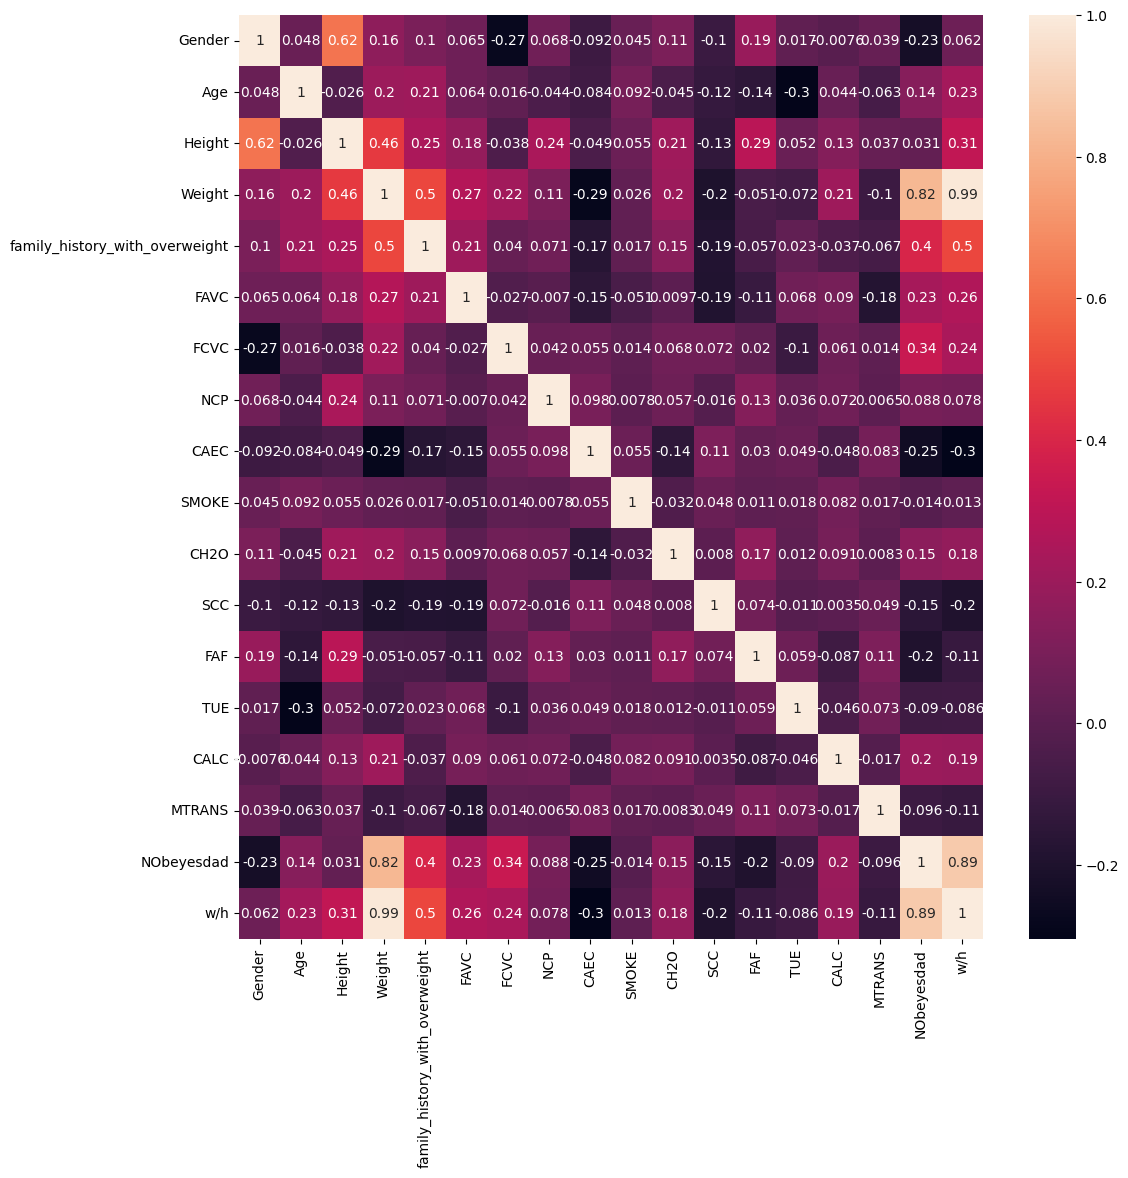

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [20]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,w/h
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,39.506173
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,36.842105
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,42.777778
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level,48.333333
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level,50.449438


In [21]:
# mapping features from categorical to numeric
df['FAVC']=df["FAVC"].map({'no':0,'yes':1})

df['Gender']=df['Gender'].map({'Female':0,'Male':1})

df['family_history_with_overweight']=df['family_history_with_overweight'].map({'yes':1,'no':0})

df['SMOKE']=df['SMOKE'].map({'no':0,'yes':1})

df['SCC']=df["SCC"].map({'no':0,'yes':1})

df['CAEC']=df['CAEC'].map({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})

df['CALC']=df['CALC'].map({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})

df['MTRANS']=df['MTRANS'].map({'Public_Transportation':0, 'Walking':1, 'Automobile':0, 'Motorbike':0,
       'Bike':0}) 

df['NObeyesdad']=df['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level':1,
                    'Obesity':2,'Extreme Obesity':4 })

In [29]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'w/h'],
      dtype='object')

In [30]:
# important features
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(df.drop(['NObeyesdad'],axis=1),df['NObeyesdad'] )
columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'w/h']
feature_scores = pd.Series(clf.feature_importances_, index=columns).sort_values(ascending=False)
feature_scores
#created new feature is best feature


w/h                               0.383691
Weight                            0.238480
FCVC                              0.090567
Gender                            0.066188
Height                            0.056485
Age                               0.039040
NCP                               0.024166
TUE                               0.020602
family_history_with_overweight    0.018611
FAF                               0.017335
CAEC                              0.012577
CH2O                              0.011757
CALC                              0.011138
FAVC                              0.006717
MTRANS                            0.001387
SMOKE                             0.000802
SCC                               0.000455
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
y=df['NObeyesdad']
df_copy=df.drop(['NObeyesdad','CALC','CAEC','SMOKE','FAVC','MTRANS','SCC'],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(df_copy,y,test_size=0.25,random_state=43)

In [32]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(xtrain)
X_test_scaled = ss.transform(xtest)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(xtrain)
X_test_mm_scaled = ss.transform(xtest)

# checking which baseline models is best 
#run multilple models  
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")   

In [33]:
#RandomForest is best even for test data
run_models(xtrain, ytrain, xtest, ytest)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.99242
Accuracy w/Scaled Data (ss): 0.99242
Accuracy w/Scaled Data (mm): 0.99242

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.99      0.99      0.99       202
           2       1.00      1.00      1.00       182
           4       1.00      1.00      1.00        84

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.98106
Accuracy w/Scaled Data (ss): 0.97917
Accuracy w/Scaled Data (mm): 0.98295

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.92     

In [34]:
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,ytrain)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,ytest)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(ytest, y_pred_scaled, target_names=target_names))

In [38]:
# Tried HyperParameterTuning
from sklearn.model_selection import GridSearchCV
n_estimators = [10,50,100]

# Criterion
criterion = ['gini','entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [10,20]

max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [43]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,          
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy Score = 0.99
{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.99      0.99      0.99       202
           2       1.00      1.00      1.00       182
           4       1.00      1.00      1.00        84

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528

